In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import load_model
import matplotlib.gridspec as gridspec
from scipy.stats import gaussian_kde
%matplotlib notebook

In [2]:
mat = pd.read_csv('C:/Users/HP/Desktop/University of Michigan/Applied Data Science with Python/Assignments/Course 2/Assignment 4/Data/student-mat.csv', sep=';')
por = pd.read_csv('C:/Users/HP/Desktop/University of Michigan/Applied Data Science with Python/Assignments/Course 2/Assignment 4/Data/student-por.csv', sep=';')
 
mat['Element'] = 'Maths'
por['Element'] = 'Portuguese'
df = pd.concat([mat,por])
df['Avg_prev_score'] = (df.G2 + df.G3)/2
df['Parents_ed'] = (df.Medu + df.Fedu)/2
df['Parents_ed'] = df['Parents_ed'].apply(np.ceil)
df = df.drop(['Medu', 'Fedu'], axis=1)
df = df.drop(['G1', 'G2'], axis = 1)
df = df.rename(columns={'G3':'Final_Score'})
df['Parents_ed'] = df['Parents_ed'] + 1 

In [3]:
df.reset_index()
df

,school,sex,age,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,...,freetime,goout,Dalc,Walc,health,absences,Final_Score,Element,Avg_prev_score,Parents_ed
0,GP,F,18,U,GT3,A,at_home,teacher,course,mother,...,3,4,1,1,3,6,6,Maths,6.0,5.0
1,GP,F,17,U,GT3,T,at_home,other,course,father,...,3,3,1,1,3,4,6,Maths,5.5,2.0
2,GP,F,15,U,LE3,T,at_home,other,other,mother,...,3,2,2,3,3,10,10,Maths,9.0,2.0
3,GP,F,15,U,GT3,T,health,services,home,mother,...,2,2,1,1,5,2,15,Maths,14.5,4.0
4,GP,F,16,U,GT3,T,other,other,home,father,...,3,2,1,2,5,4,10,Maths,10.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,services,other,course,mother,...,4,2,1,2,5,4,10,Portuguese,10.5,4.0
645,MS,F,18,U,LE3,T,teacher,services,course,mother,...,3,4,1,1,1,4,16,Portuguese,15.5,3.0
646,MS,F,18,U,GT3,T,other,other,course,mother,...,1,1,1,1,5,6,9,Portuguese,10.5,2.0
647,MS,M,17,U,LE3,T,services,services,course,mother,...,4,5,3,4,2,6,10,Portuguese,10.0,3.0


<IPython.core.display.Javascript object>


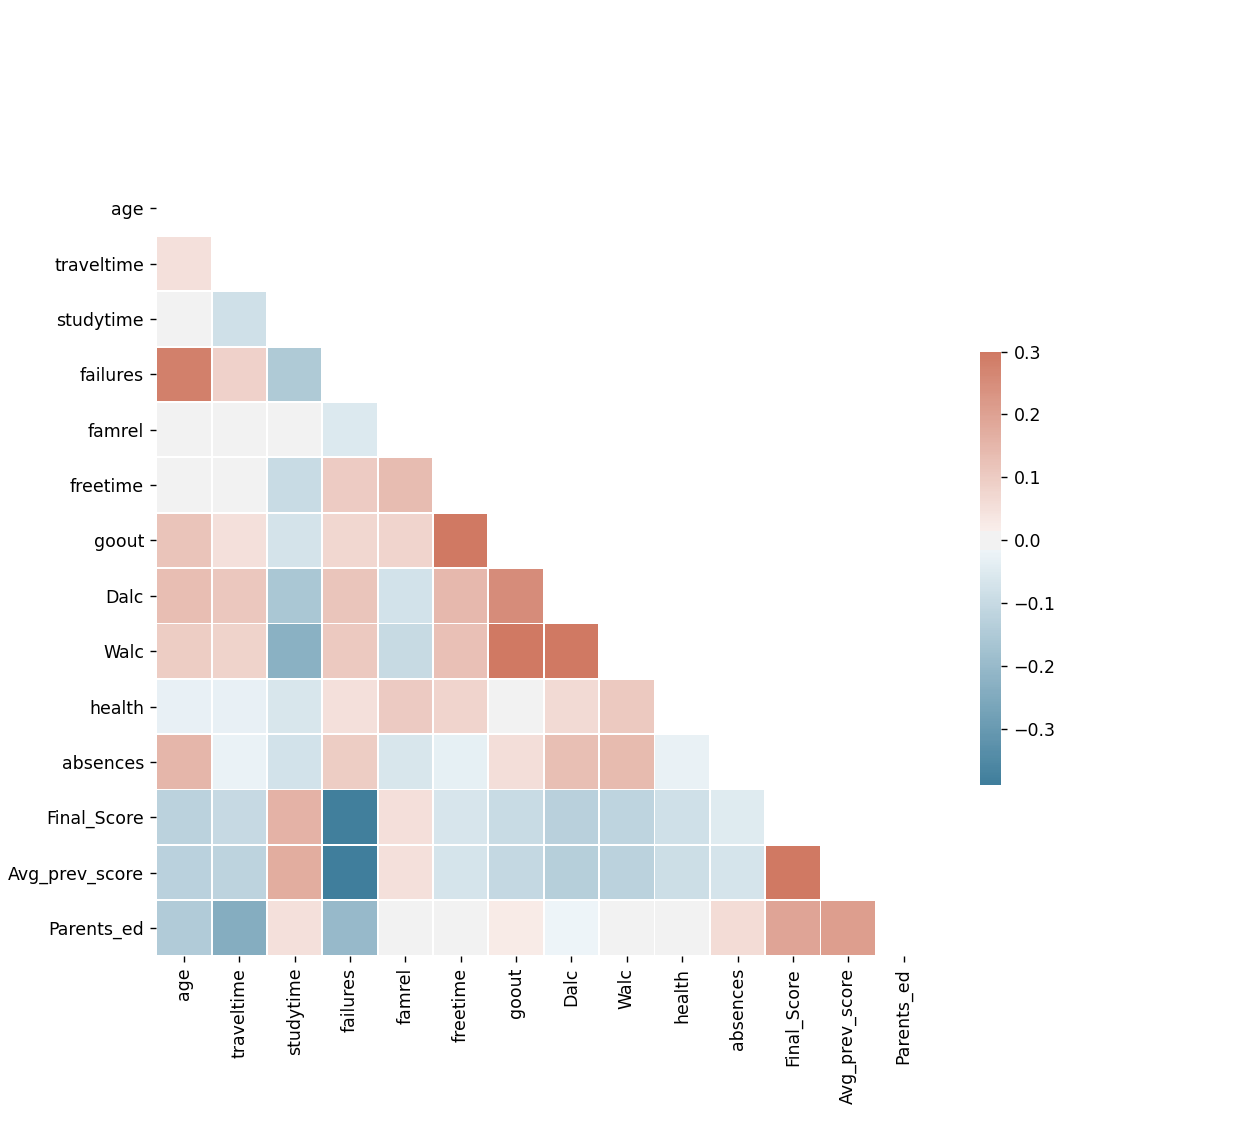

In [4]:
#own
corr_mat = df.corr()
mask = np.triu(np.ones_like(corr_mat, dtype='bool'))





corr_mat = df.corr()
#plt.plot(mat.G2, '+')
mask = np.triu(np.ones_like(corr_mat, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_mat, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [5]:
df = df[['Parents_ed', 'studytime', 'famrel','Element', 'Avg_prev_score', 'Final_Score']]
df.head()

,Parents_ed,studytime,famrel,Element,Avg_prev_score,Final_Score
0,5.0,2,4,Maths,6.0,6
1,2.0,2,5,Maths,5.5,6
2,2.0,2,4,Maths,9.0,10
3,4.0,3,3,Maths,14.5,15
4,4.0,2,4,Maths,10.0,10


<IPython.core.display.Javascript object>


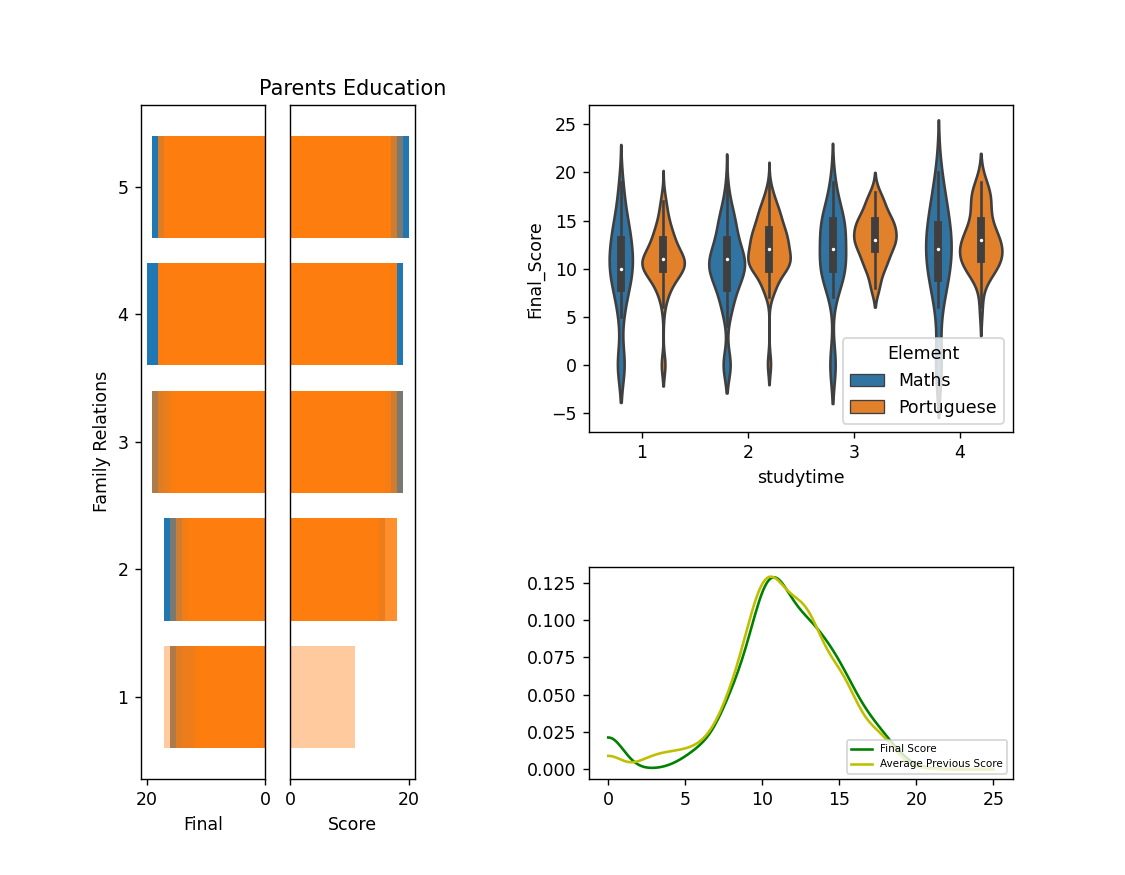

In [195]:
plt.figure(figsize=(9,7))
gspec = gridspec.GridSpec(6,6)

left_barplot = plt.subplot(gspec[0:,0])
right_barplot = plt.subplot(gspec[0:,1])
bottom_kde = plt.subplot(gspec[4:,3:])
top_violenplot = plt.subplot(gspec[0:3,3:])

In [196]:
left_barplot.barh(df[df['Element']=='Maths']['famrel'], df[df['Element']=='Maths']['Final_Score'])
plt_l =left_barplot.barh(df[df['Element']=='Portuguese']['famrel'], df[df['Element']=='Portuguese']['Final_Score'], alpha =0.4)

right_barplot.barh(df[df['Element']=='Maths']['Parents_ed'], df[df['Element']=='Maths']['Final_Score'])
right_barplot.barh(df[df['Element']=='Portuguese']['Parents_ed'], df[df['Element']=='Portuguese']['Final_Score'], alpha = 0.4)

density = gaussian_kde(df['Final_Score'])
density2 = gaussian_kde(df['Avg_prev_score'])
xs = np.linspace(0,25,200)
density.covariance_factor = lambda : .25
density._compute_covariance()
p1 = bottom_kde.plot(xs,density(xs), 'g')
p2 = bottom_kde.plot(xs,density2(xs), 'y')

bottom_kde.legend((p1[0], p2[0]), ('Final Score', 'Average Previous Score'), loc = 4, prop={'size': 6})

sns.violinplot(x="studytime", y="Final_Score", hue="Element", kind="box", data=df)


In [197]:

right_barplot.axes.get_yaxis().set_visible(False)

right_barplot.title.set_text('Parents Education')
left_barplot.set_ylabel("Family Relations", fontsize=10)
left_barplot.invert_xaxis()
right_barplot.yaxis.set_label_position('right')
right_barplot.set_ylabel("Parents Education", fontsize=10)
right_barplot.set_xlabel("Score", fontsize=10)
left_barplot.set_xlabel("Final", fontsize=10)



Text(0.5, 59.15277777777776, 'Final')

C:\Users\HP\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<IPython.core.display.Javascript object>


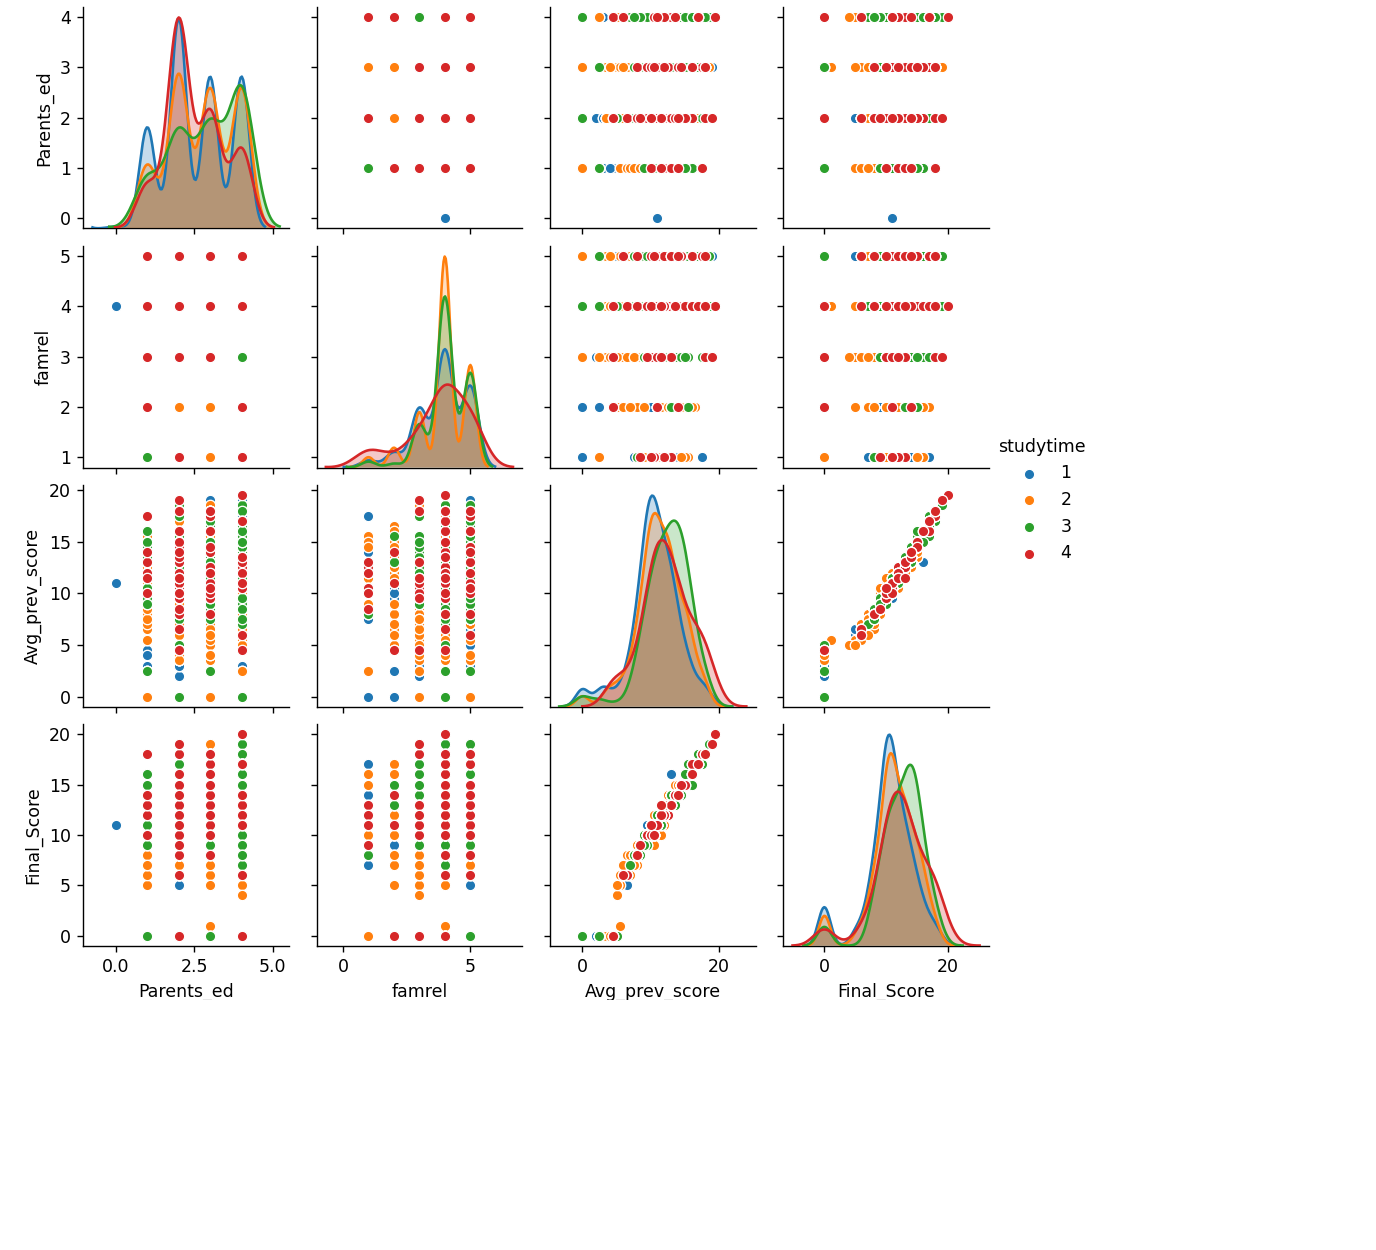

In [318]:
sns.pairplot(df, hue='studytime', diag_kind='kde', size=2);